In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

def f(x):
    return x * np.sin(x)
rng = np.random.RandomState(0)
x_plot = np.linspace(-1, 11, 100)
x_train = np.linspace(0, 10, 100)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
x_train = x_train[:, np.newaxis]
z_train = f(x_train)

In [7]:
model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=1e-3))
model.fit(x_train, z_train)
z_poly = model.predict(x_train)

In [26]:
def g(x, y):
    return np.sin(x) + 0.5 * np.cos(y)

y_plot = np.array(x_plot)
y_train = np.array(x_train)
z_train = g(x_train, y_train)

In [28]:
X_train = np.hstack([x_train, y_train])
model = make_pipeline(PolynomialFeatures(5), Ridge(alpha=1e-3))
model.fit(X_train, z_train)
z_poly = model.predict(X_train)

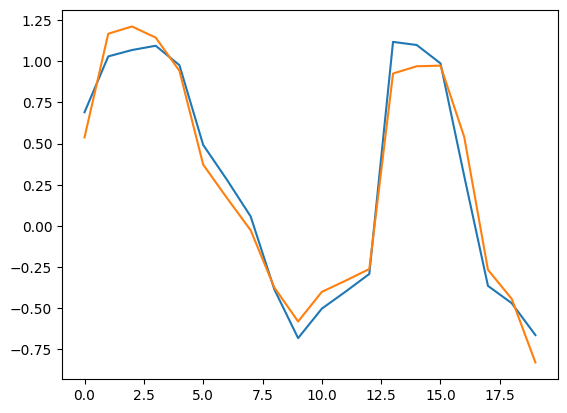

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(z_train)
ax.plot(z_poly)
plt.show()

In [44]:
LOOKUP_TABLE = r'/Volumes/GoogleDrive/Shared drives/StranksLab/Personal Folders/Cullen Chosy/Code/theseus/data/lookup_table.csv'
h = 4.1357e-15
c = 2.9979e8
k = 8.6173e-5
q = 1.602e-19
T = 298.15
alpha = 10

nx = round(1.5 / 0.05) + 1
ny = round((100 + 60) / 0.1) + 1
d = pd.read_csv(LOOKUP_TABLE, names=['G'], usecols=[2])
theta = np.linspace(0.5, 2, nx)
energy = np.linspace(-60, 100, ny)
d = np.reshape(d['G'].to_numpy(), (nx, ny))
X, Y = np.meshgrid(theta, energy)
X_train = np.hstack([X.reshape(-1, 1), Y.reshape(-1, 1)])
model = make_pipeline(PolynomialFeatures(5), Ridge(alpha=1e-3))
model.fit(X_train, d.reshape(-1, 1))
z_poly = model.predict(X_train)

/Users/cbchosy/opt/anaconda3/envs/theseus/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.15254e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


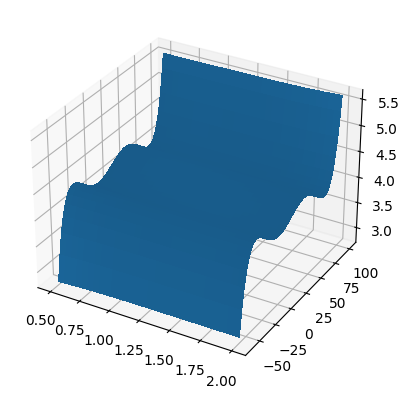

In [45]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
T, E = np.meshgrid(theta, energy)
z_poly = z_poly.reshape(T.shape)
surf = ax.plot_surface(T, E, z_poly, linewidth=0, antialiased=False)